In [1]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import IPython
import librosa
import librosa.display
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/neuroethology/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


In [2]:
y, sr = librosa.load('butcherbird_2_birds_example.wav')

In [3]:
len(y), sr

(110265, 22050)

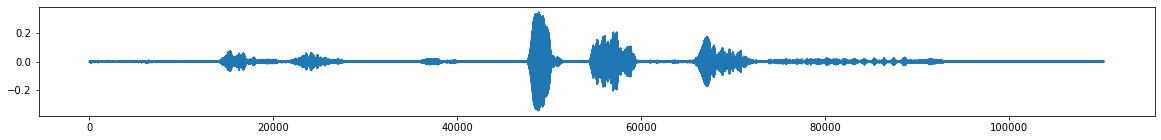

In [4]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(y)

In [103]:
??librosa.display.specshow

21.49122807017544

In [100]:
D = np.abs(librosa.stft(y, n_fft=1024))**2
S_dB = librosa.power_to_db(D, ref=np.max)
spec = S_dB

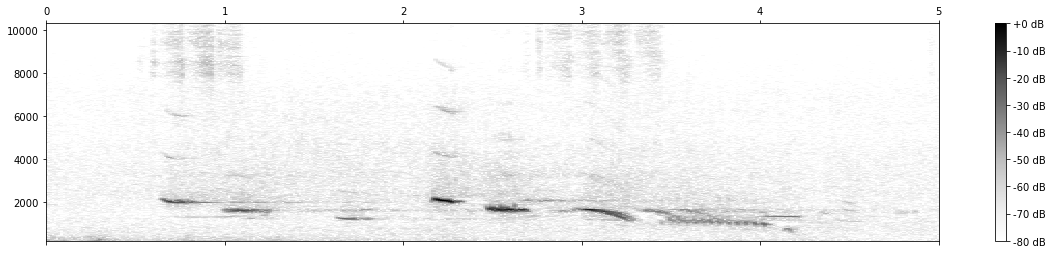

In [109]:
fmin = 10
fmax = 480
f_unit = sr/2/(spec.shape[0])

fig, ax = plt.subplots(figsize=(20,4))
#img = librosa.display.specshow(spec[10:480,:], cmap='Greys', y_axis='linear', sr=sr,
#                         fmin = fmin*f_unit, fmax=fmax*f_unit, ax=ax)
ax.matshow(spec[fmin:fmax,:], origin='lower', aspect='auto', cmap = 'Greys', extent = [ 0, len(y)/sr, fmin*f_unit, fmax*f_unit,])
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

In [120]:
len(y)/sr

5.000680272108844

In [111]:
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
melspec = S_dB

In [112]:
melspec.shape, S.shape

((128, 431), (128, 431))

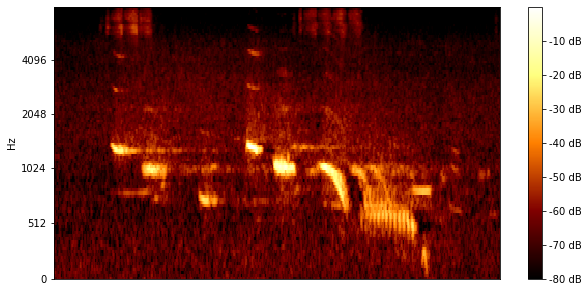

In [118]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(melspec[20:], cmap='afmhot', y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()